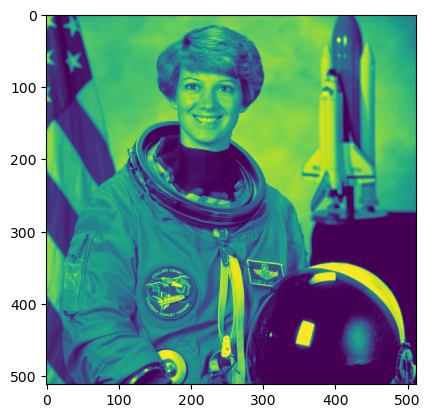

In [3]:
import numpy as np 
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage import color, data, restoration

 
image=color.rgb2gray(data.astronaut())
plt.imshow(image)
plt.show()

In [5]:
def convolve2D(image, kernel):

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    output = np.zeros((image.shape))
    imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        for x in range(image.shape[0]):
            # Go to next row once kernel is out of bounds
            if x > image.shape[0] - xKernShape:
                break
            try:
                # Only Convolve if x has moved by the specified Strides
                output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                break

    return output

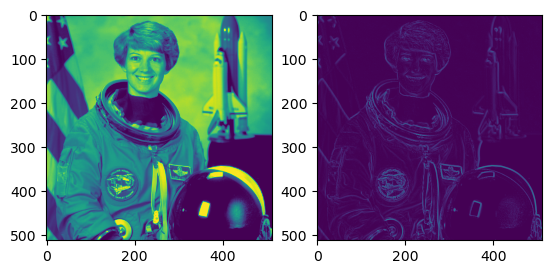

In [21]:
from scipy import ndimage
import libtest
image=color.rgb2gray(data.astronaut())

Faler=[ np.array([[-1,0,1],[-1,0,1],[-1,0,1]]), 
        np.array([[1,1,1],[0,0,0],[-1,-1,-1]]),
    np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),
    np.array([[0,1,0],[-1,0,1],[0,-1,0]]) ] 


def detect_edges_python(image,masks):
    edges=zeros(image.shape)
    for mask in masks:
        edges=maximum(convolve2D(image,mask), edges)    
    return edges

def detect_edges_cpp(image,masks):
    edges=zeros(image.shape)
    for mask in masks:
        edges=maximum(libtest.convolution_2d(image,mask), edges)
    return edges

def detect_edges_scipy(image,masks):
    edges=zeros(image.shape)
    for mask in masks:
        edges=np.maximum(ndimage.convolve(image,mask), edges)
    return edges


edges=detect_edges_scipy(image, Faler) 
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(edges)

plt.show()